In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

# Upload multiple files
uploaded = files.upload()


Saving basket_details.csv to basket_details (2).csv
Saving customer_details.csv to customer_details (1).csv


In [ ]:
import pandas as pd

# Load CSVs into separate DataFrames
df_customer = pd.read_csv("customer_details.csv")
df_basket = pd.read_csv("basket_details.csv")

# Display first 5 rows of each dataset
print("Customer Dataset:")
print(df_customer.head())

print("\nBasket Dataset:")
print(df_basket.head())


Customer Dataset:
   customer_id   sex  customer_age  tenure
0      9798859  Male          44.0      93
1     11413563  Male          36.0      65
2       818195  Male          35.0     129
3     12049009  Male          33.0      58
4     10083045  Male          42.0      88

Basket Dataset:
   customer_id  product_id basket_date  basket_count
0     42366585    41475073  2019-06-19             2
1     35956841    43279538  2019-06-19             2
2     26139578    31715598  2019-06-19             3
3      3262253    47880260  2019-06-19             2
4     20056678    44747002  2019-06-19             2


In [ ]:
print(df_customer.info())
print(df_basket.info())

print(df_customer.isnull().sum())  # Check missing values
print(df_basket.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   20000 non-null  int64  
 1   sex           20000 non-null  object 
 2   customer_age  20000 non-null  float64
 3   tenure        20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB
None
customer_id     0
sex             0
customer_age    0
tenure          0
dtype: int64
customer_id     0
product_id      0
basket_date     0
basket_co

In [ ]:
df_combined = pd.merge(df_customer, df_basket, on="customer_id", how="inner")  # Inner join to keep common customers
print(df_combined.head())


   customer_id   sex  customer_age  tenure  product_id basket_date  \
0      9500953  Male          55.0      96     3446783  2019-06-10   
1       851739  Male          40.0     129    32920704  2019-06-19   
2      9654043  Male          37.0      95    51307669  2019-06-08   
3      4912369  Male          36.0     114    33923115  2019-05-20   
4      9875271  Male          34.0      92    31586037  2019-06-06   

   basket_count  
0             3  
1             2  
2             2  
3             2  
4             2  


In [ ]:
print(df_combined.describe())  # For numerical columns
print(df_combined['sex'].value_counts())  # Count of male & female customers


        customer_id  customer_age      tenure    product_id  basket_count
count  7.200000e+01     72.000000   72.000000  7.200000e+01     72.000000
mean   1.554364e+07     68.458333   56.180556  3.140376e+07      2.152778
std    9.961282e+06    234.574289   38.948621  1.616160e+07      0.362298
min    3.809750e+05      5.000000    4.000000  8.287500e+04      2.000000
25%    1.026443e+07     29.000000   24.750000  2.980404e+07      2.000000
50%    1.352736e+07     35.500000   45.500000  3.498005e+07      2.000000
75%    2.037478e+07     43.000000   83.750000  4.359420e+07      2.000000
max    4.328080e+07   2022.000000  130.000000  5.130767e+07      3.000000
sex
Male      58
Female    14
Name: count, dtype: int64


In [ ]:
df_combined = df_combined[df_combined['customer_age'] < 100]  # Assuming no customer is older than 100


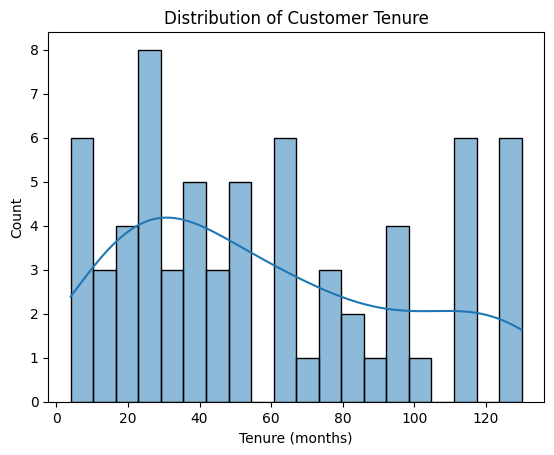

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_combined['tenure'], bins=20, kde=True)
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.title("Distribution of Customer Tenure")
plt.show()


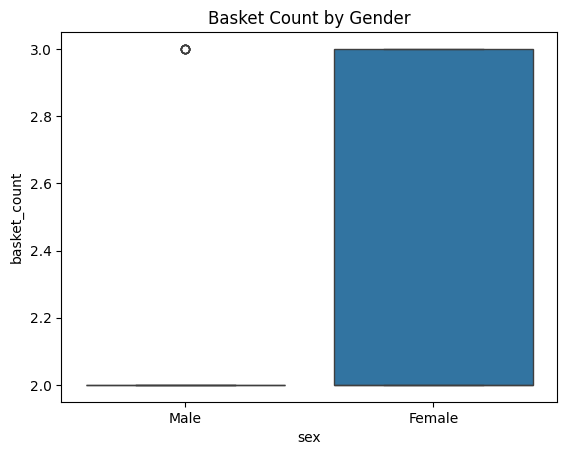

In [ ]:
sns.boxplot(x="sex", y="basket_count", data=df_combined)
plt.title("Basket Count by Gender")
plt.show()


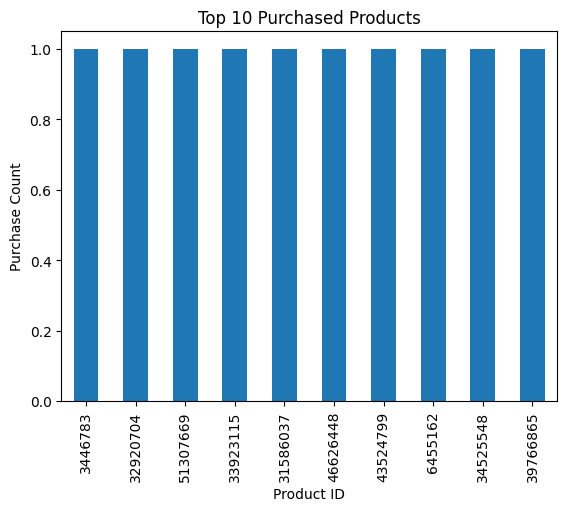

In [ ]:
top_products = df_combined['product_id'].value_counts().head(10)
top_products.plot(kind="bar", title="Top 10 Purchased Products")
plt.xlabel("Product ID")
plt.ylabel("Purchase Count")
plt.show()


In [ ]:
df_combined.to_csv("cleaned_dataset.csv", index=False)

# Download it
from google.colab import files
files.download("cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>